<a href="https://colab.research.google.com/github/Avishek2020/Projekt1/blob/master/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
 # https://www.youtube.com/watch?v=eMOA1pPVUc4
 import pandas as pd
 import os

In [31]:
df = pd.read_csv("/content/sales_data/Sales_April_2019.csv")
df.count

<bound method DataFrame.count of       Order ID  ...                        Purchase Address
0       176558  ...            917 1st St, Dallas, TX 75001
1          NaN  ...                                     NaN
2       176559  ...       682 Chestnut St, Boston, MA 02215
3       176560  ...    669 Spruce St, Los Angeles, CA 90001
4       176560  ...    669 Spruce St, Los Angeles, CA 90001
...        ...  ...                                     ...
18378   194090  ...   177 Jackson St, Los Angeles, CA 90001
18379   194091  ...         311 Forest St, Austin, TX 73301
18380   194092  ...  347 Sunset St, San Francisco, CA 94016
18381   194093  ...         835 Lake St, Portland, OR 97035
18382   194094  ...          354 North St, Boston, MA 02215

[18383 rows x 6 columns]>

In [3]:
files = [file for file in os.listdir("/content/sales_data/")]

In [4]:
# https://railsware.com/blog/python-for-machine-learning-pandas-axis-explained/#:~:text=A%20DataFrame%20object%20has%20two,it%20goes%20along%20rows%20direction.
all_month_data = pd.DataFrame()
for file in files:
    if file[-3:] in "csv":
        #print("/content/sales_data/"+file)
        df = pd.read_csv("/content/sales_data/"+file)
        all_month_data = pd.concat([all_month_data, df], axis =0)

all_month_data.to_csv("all_data.csv", index=False)

In [5]:
all_data = pd.read_csv("/content/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


 ### Clean up the Data

#### *Drop rows of NAN*

In [7]:
#nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(axis=0, how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


#### *Find 'Or' and delete it*

In [8]:
all_data =  all_data[all_data['Order Date'].str[0:2] !='Or']
all_data.count

<bound method DataFrame.count of        Order ID  ...                           Purchase Address
0        194095  ...        669 2nd St, New York City, NY 10001
1        194096  ...            844 Walnut St, Dallas, TX 75001
2        194097  ...    164 Madison St, New York City, NY 10001
3        194098  ...            622 Meadow St, Dallas, TX 75001
4        194099  ...            17 Church St, Seattle, WA 98101
...         ...  ...                                        ...
186845   176554  ...       672 12th St, San Francisco, CA 94016
186846   176555  ...         42 4th St, San Francisco, CA 94016
186847   176556  ...          871 7th St, Los Angeles, CA 90001
186848   176557  ...  83 Washington St, San Francisco, CA 94016
186849   176557  ...  83 Washington St, San Francisco, CA 94016

[185950 rows x 6 columns]>

#### *Convert columns Qumatity Ordered and Price Each to correct type*

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float

### Augment data with additional column

#### Add Month column

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] =all_data['Month'].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


#### Add a sales column

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98
...,...,...,...,...,...,...,...,...
186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",3,14.95
186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",3,149.99
186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",3,8.97
186848,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",3,700.00


#### Add a City column

In [12]:
def get_city(purchase_address):
    p_city = purchase_address.split(',')[1]
    return p_city 

def get_state(address):
    p_state_pin = address.split(',')[2]
    p_state = p_state_pin.split(' ')[1]
    return p_state
 

In [13]:
#all_data['City'] =all_data['Purchase Address'].apply(get_city)

all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))
all_data['City'] =all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,NY,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,TX,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,NY,New York City (NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,TX,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,WA,Seattle (WA)


### Best Month for sales

In [14]:
results = all_data.groupby('Month').sum()

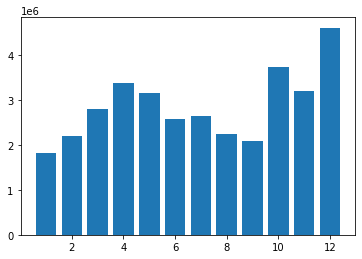

In [15]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.show()

### what city has higest no of sales

In [16]:
results = all_data.groupby('City').sum()

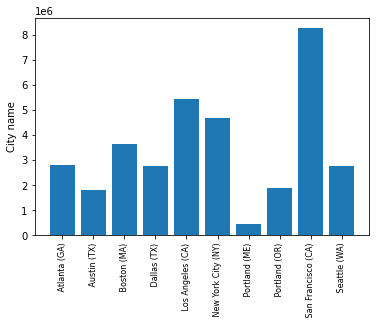

In [17]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]
#cities = all_data['City'].unique()
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation ='vertical', size =8)
plt.ylabel('City name')
plt.show()

### What time should we display advertsiment to maximum likelihood of customer buying product

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,NY,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,TX,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,NY,New York City (NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,TX,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,WA,Seattle (WA)


In [19]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [21]:
all_data['Hour']   = all_data['Order Date'].dt.hour 
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,Hour,Minute
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,NY,New York City (NY),17,14
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,TX,Dallas (TX),14,43
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,NY,New York City (NY),11,36
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,TX,Dallas (TX),20,40
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,WA,Seattle (WA),22,55


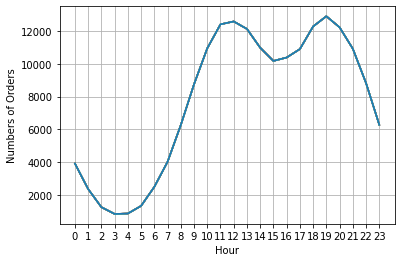

In [30]:
import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby('Hour')]
#cities = all_data['City'].unique()
plt.plot(hours, all_data.groupby(['Hour']).count()) 
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Numbers of Orders')
plt.grid()
plt.show()

In [41]:
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,Hour,Minute,Grouped
15,194110,Google Phone,1,600.00,2019-05-31 18:07:00,"498 14th St, Los Angeles, CA 90001",5,600.00,CA,Los Angeles (CA),18,7,"Google Phone,Wired Headphones"
16,194110,Wired Headphones,1,11.99,2019-05-31 18:07:00,"498 14th St, Los Angeles, CA 90001",5,11.99,CA,Los Angeles (CA),18,7,"Google Phone,Wired Headphones"
77,194170,Google Phone,1,600.00,2019-05-30 12:30:00,"711 Maple St, San Francisco, CA 94016",5,600.00,CA,San Francisco (CA),12,30,"Google Phone,USB-C Charging Cable"
78,194170,USB-C Charging Cable,2,11.95,2019-05-30 12:30:00,"711 Maple St, San Francisco, CA 94016",5,23.90,CA,San Francisco (CA),12,30,"Google Phone,USB-C Charging Cable"
82,194174,iPhone,1,700.00,2019-05-04 23:08:00,"37 North St, Seattle, WA 98101",5,700.00,WA,Seattle (WA),23,8,"iPhone,Lightning Charging Cable,Wired Headphones"


### What product are often sold together

In [43]:
df_dup = all_data[all_data['Order ID'].duplicated(keep= False)]

df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_dup = df_dup[['Order ID','Grouped']].drop_duplicates()
df_dup.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
15,194110,"Google Phone,Wired Headphones"
77,194170,"Google Phone,USB-C Charging Cable"
82,194174,"iPhone,Lightning Charging Cable,Wired Headphones"
89,194179,"Flatscreen TV,AAA Batteries (4-pack)"
103,194192,"Wired Headphones,Bose SoundSport Headphones"


In [47]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold most and why?

In [48]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,Hour,Minute
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,NY,New York City (NY),17,14
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,TX,Dallas (TX),14,43
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,NY,New York City (NY),11,36
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,TX,Dallas (TX),20,40
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,WA,Seattle (WA),22,55


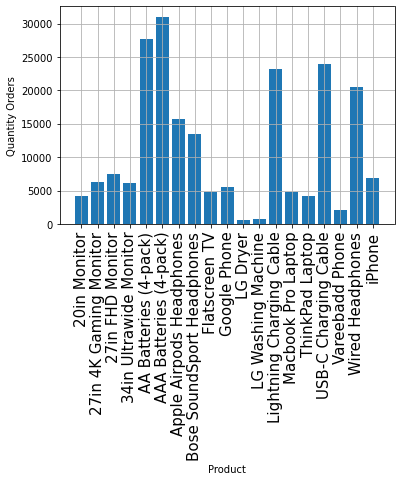

In [57]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()['Quantity Ordered']

products =[product for product, df in product_group]

plt.bar(products, quantity_ordered) 
plt.xticks(products, rotation = 'vertical', size =15)
plt.xlabel('Product')
plt.ylabel('Quantity Orders')
plt.grid()
plt.show()

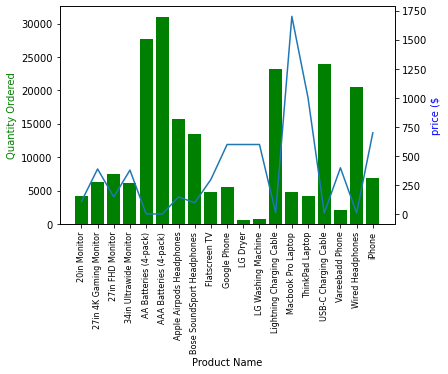

In [60]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ='g')
ax2.plot(products, prices)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color ='g')
ax2.set_ylabel('price ($', color ='b')
ax1.set_xticklabels(products, rotation ='vertical', size = 8)

plt.show()